### Simulación de Monte Carlo

La **Simulación de Monte Carlo** es una técnica matemática utilizada para estimar los posibles resultados de un evento incierto. El nombre proviene de una ciudad llamada Monte Carlo, conocida por los juegos de azar. Es una simulación que evoluciona aleatoriamente.

Estas simulaciones nos ayudan a mejorar los resultados de Backtesting. Como solo se puede hacer Backtesting manualmente en un único recorrido histórico, no podemos esperar predecir los precios futuros con ello, pero con Monte Carlo, podemos crear tantas simulaciones de precios como queramos.

Funciona con la ley de los grandes números y modela la probabilidad de diferentes resultados de una situación que son difíciles de predecir debido a la intervención de variables aleatorias.

Utiliza el **muestreo aleatorio**, que es un método utilizado para producir múltiples posibles resultados a partir de muestras aleatorias de datos, y calcular el resultado promedio.

Monte Carlo se usa en campos como la Gestión de Carteras, ejecutándose bajo múltiples escenarios para dar a los inversores una idea de cómo su cartera se desempeñará bajo varias condiciones de mercado. También se usa en análisis de riesgo, valoración de opciones y planificación de capacidad excedente. No solo se usa en finanzas, sino también en medicina y astrofísica.

#### Procedimiento simple para ejecutar una Simulación de Monte Carlo:
1. **Establecer un modelo predictivo.**
2. **Especificar la distribución de probabilidad.**
3. **Ejecutar simulaciones repetidas.**
4. **Calcular la varianza y la desviación estándar** para analizar mejor tus datos.

Si los datos son demasiado grandes para ejecutar una simulación, también puedes usar **niveles de confianza**, que es la probabilidad de que los resultados muestreados contengan el valor verdadero de tu parámetro.

Estas simulaciones también ayudan a explorar la **Máxima Pérdida Histórica**. Para simplificar, obtenemos solo un valor de pérdida después del Backtesting Manual. Con las Simulaciones de Monte Carlo, puedes crear una distribución de Pérdidas que te dará una mejor idea de cómo se comporta tu estrategia frente a las fuerzas reales del mercado.

### Importamos librerías necesarias

El siguiente código muestra una Simulación de Monte Carlo muy simple sobre 3 acciones en un marco de tiempo diario durante 252 días. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr
import yfinance as yf


### Seteamos un rango temporal



In [2]:
years=6
end_date=dt.datetime.now()
start_date=end_date-dt.timedelta(days=365*years)


### Lista de tickers y extracción de datos



In [4]:
tickers=["UNP","IBM","ORCL"]
adj_close_df=pd.DataFrame()

for ticker in tickers:
    data=yf.download(ticker,start=start_date,end=end_date)
    adj_close_df[ticker]=data['Adj Close']

adj_close_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,UNP,IBM,ORCL
Date,,,
2018-08-06,130.797073,104.852715,44.221676
2018-08-07,131.472504,105.556404,44.049038
2018-08-08,131.560242,105.470207,43.967262
2018-08-09,130.490051,105.071068,44.103554
2018-08-10,130.560196,104.860565,43.903664
...,...,...,...
2024-07-29,242.149994,191.500000,138.309998
2024-07-30,245.429993,191.039993,135.669998
2024-07-31,246.729996,192.139999,139.449997


### Retornos logarítmicos diarios y limpieza de datos

In [5]:
returns=np.log(adj_close_df/adj_close_df.shift(1))
returns.dropna(inplace=True)
returns

,UNP,IBM,ORCL
Date,,,
2018-08-07,0.005151,0.006689,-0.003912
2018-08-08,0.000667,-0.000817,-0.001858
2018-08-09,-0.008168,-0.003792,0.003095
2018-08-10,0.000537,-0.002005,-0.004543
2018-08-13,-0.001412,-0.012326,-0.006436
...,...,...,...
2024-07-29,0.007420,-0.001305,-0.005048
2024-07-30,0.013454,-0.002405,-0.019272
2024-07-31,0.005283,0.005741,0.027481


### Calculando la desviación estándar y la matriz de covarianzas.

In [6]:
def statistical_measures(weights,daily_returns,cov_matrix):
    meanReturns=daily_returns.mean()
    var=weights.T*cov_matrix*weights #Calcula la varianza del portafolio. Usa la fórmula de varianza de portafolio: w^T * Σ * w, donde w son los pesos y Σ es la matriz de covarianza.
    standard_deviation=np.sqrt(var) # Std como raiz cuadrada de la varianza del portfolio

    return standard_deviation,meanReturns

cov_matrix=returns.cov()
weights=np.array([1/len(tickers)]*len(tickers)) #Crea un array de pesos iguales para cada activo.

standard_deviation,meanReturns=statistical_measures(weights,returns,cov_matrix)

print(meanReturns*100)

UNP     0.040038
IBM     0.038538
ORCL    0.073545
dtype: float64


### Descomposición de Cholesky y simulación de Monte Carlo

El programa utiliza la Descomposición de Cholesky para introducir una estructura de correlación a los activos en la cartera. 

La descomposición de Cholesky es una técnica matemática utilizada en álgebra lineal para descomponer una matriz simétrica y definida positiva en el producto de una matriz triangular inferior y su traspuesta. Específicamente, para una matriz $A$ simétrica y definida positiva, la descomposición de Cholesky produce una matriz triangular inferior $L$ tal que:

$$A = LL^T$$

Donde $L^T$ es la transpuesta de $L$

### Usos de la Descomposición de Cholesky
- **Resolución de Sistemas de Ecuaciones Lineales**: Es utilizada para resolver sistemas de ecuaciones lineales de manera eficiente.
- **Simulaciones Estadísticas**: En finanzas y otras disciplinas, se utiliza para generar muestras de variables aleatorias con una estructura de correlación específica.
- **Optimización y Métodos Numéricos**: Facilita cálculos en métodos numéricos que requieren la manipulación de matrices definidas positivas.

### Ventajas
- **Eficiencia Computacional**: Es más eficiente y estable numéricamente comparada con otras técnicas como la descomposición LU.
- **Simplicidad en el Cálculo**: Reduce la complejidad de los cálculos necesarios para resolver problemas relacionados con matrices simétricas y definidas positivas.

### En Finanzas, la descomposición de Cholesky se usa para generar retornos correlacionados. La matriz de covarianza captura las relaciones entre los retornos de diferentes activos, y la descomposición de Cholesky nos permite "extraer" esta estructura de correlación.

In [11]:
sims=100
time_range=252 #Define el número de simulaciones y el horizonte temporal (252 días hábiles en un año).
simulations=np.zeros((time_range,len(tickers),sims)) #Crea un array 3D para almacenar los resultados de las simulaciones.

L=np.linalg.cholesky(cov_matrix) #Realiza la descomposición de Cholesky de la matriz de covarianza. Esta se usa para generar retornos correlacionados en la simulación.


# Genera números aleatorios normales.
# Los multiplica por la matriz de Cholesky transpuesta para obtener retornos correlacionados.
# Añade los retornos medios para obtener los retornos simulados.

for m in range(0,sims):
    Z=np.random.normal(size=(time_range,len(tickers)))
    cor_Z=Z@L.T
    sim_returns=meanReturns.values + cor_Z

    for j in range(len(tickers)):
        price_series=[adj_close_df[tickers[j]].iloc[-1]] #Empieza con el último precio disponible para cada acción
        for d in range(time_range):
            next_price=price_series[-1]*np.exp(sim_returns[d,j])
            price_series.append(next_price)
        simulations[:,j,m]=price_series[1:]

        # En este ultimo codigo para cada activo en cada simulación:

             #Comienza con el último precio conocido.
             #Calcula los precios futuros usando la fórmula de retorno logarítmico: P_t = P_(t-1) * e^r_t
             #Almacena los precios simulados en el array de simulaciones.

### Graficamos la simulación

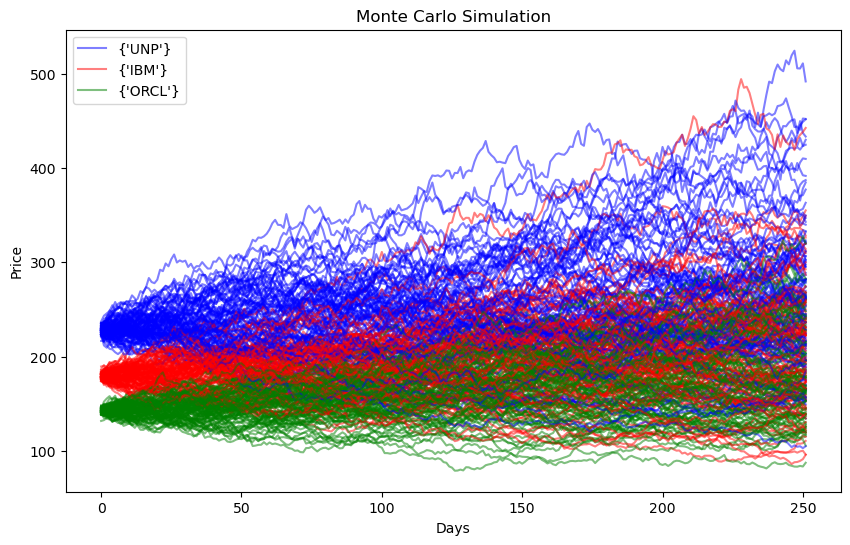

In [12]:
plt.figure(figsize=(10,6))
for i in range(sims):
    plt.plot(simulations[:,0,i], color='blue',alpha=0.5)
    plt.plot(simulations[:,1,i], color='red',alpha=0.5)
    plt.plot(simulations[:,2,i], color='green',alpha=0.5)

plt.title(f"Monte Carlo Simulation")
plt.xlabel('Days')
plt.ylabel('Price')
plt.gca().legend(({tickers[0]},{tickers[1]},{tickers[2]}))
plt.show()